
# Financial Access and Inclusion Analysis
## Theme 3: Finance - Financial Access and Inclusion

**Context:** Financial access through credit, funding, and digital platforms has expanded across Africa, but inclusivity challenges persist.  
**Objective:** Analyze financial access and usage data to identify gaps and recommend targeted interventions.
    

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_excel("FINDEXEXCEL.xlsx", sheet_name="Data")

# Step 1: Standardize Column Names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Step 2: Convert Data to Long Format (Melt the dataset)
df_long = df.melt(id_vars=["country_name", "country_code", "indicator_name", "indicator_code"], 
                  var_name="year", value_name="financial_access")

# Step 3: Convert Year Column to Numeric
df_long["year"] = pd.to_numeric(df_long["year"], errors="coerce")

# Step 4: Convert Financial Access Column to Numeric (Handling Non-Numeric Values)
df_long["financial_access"] = pd.to_numeric(df_long["financial_access"], errors="coerce")

# Step 5: Drop Rows with Missing Year Values (NaN)
df_long = df_long.dropna(subset=["year"])

# Step 6: Optimize Interpolation by Using Forward & Backward Fill (Instead of Full Interpolation)
df_long["financial_access"] = df_long.groupby(["country_name", "indicator_name"])["financial_access"].ffill().bfill()

# Step 7: Filter Only African Countries
african_countries = [
    "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde", 
    "Cameroon", "Central African Republic", "Chad", "Comoros", "Democratic Republic of the Congo",
    "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia", 
    "Ghana", "Guinea", "Guinea-Bissau", "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya", 
    "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", 
    "Niger", "Nigeria", "Republic of the Congo", "Rwanda", "Sao Tome and Principe", "Senegal", 
    "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan", "Sudan", "Tanzania", 
    "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"
]
df_africa = df_long[df_long["country_name"].isin(african_countries)]

# Step 8: Handle Outliers Using IQR Method
numerical_cols = ["financial_access"]
Q1 = df_africa[numerical_cols].quantile(0.25)
Q3 = df_africa[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip outliers
df_africa[numerical_cols] = df_africa[numerical_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)

# Step 9: Save the Cleaned Data for Further Analysis
cleaned_file_path = "Cleaned_FINDEX_Africa.csv"
df_africa.to_csv(cleaned_file_path, index=False)

# Display a summary of the cleaned dataset
df_africa.info(), cleaned_file_path

C:\Users\USER\AppData\Local\Temp\ipykernel_12016\2053863785.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa[numerical_cols] = df_africa[numerical_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)


<class 'pandas.core.frame.DataFrame'>
Index: 263590 entries, 29424 to 1127919
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   country_name      263590 non-null  object 
 1   country_code      263590 non-null  object 
 2   indicator_name    263590 non-null  object 
 3   indicator_code    263590 non-null  object 
 4   year              263590 non-null  int64  
 5   financial_access  263590 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 14.1+ MB


(None, 'Cleaned_FINDEX_Africa.csv')

#

#

## 3. Exploratory Data Analysis (EDA):
#### a. Analyse the financial service-usage /access distribution across population demographics.

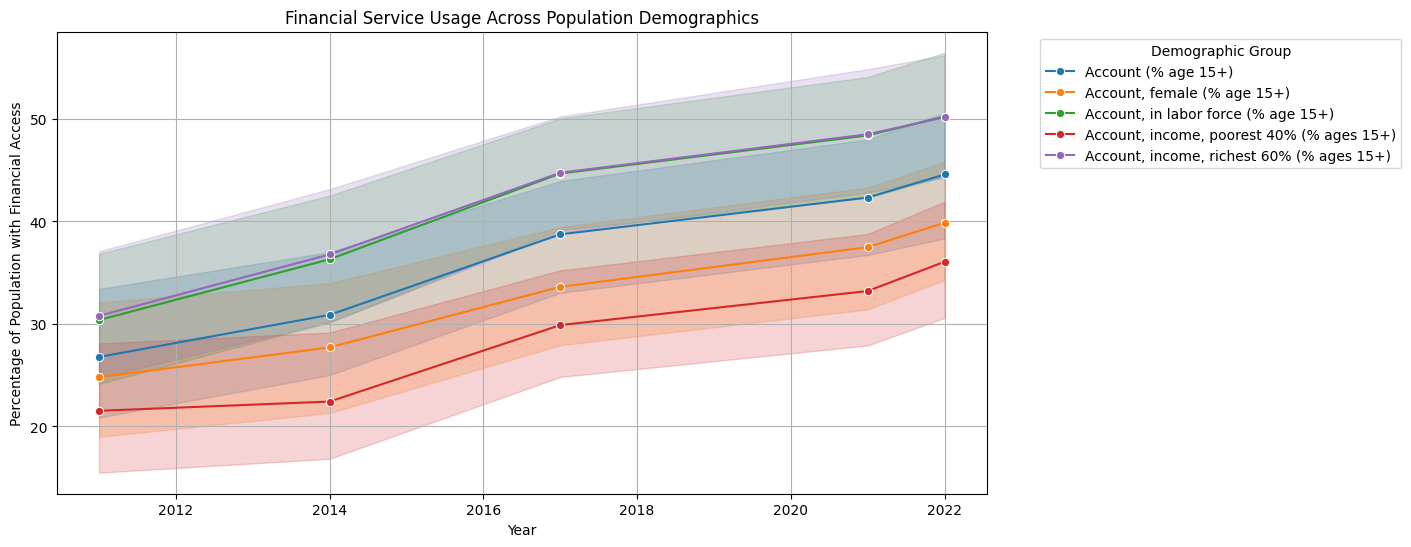

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select key demographic indicators for analysis
demographic_indicators = [
    "Account (% age 15+)", 
    "Account, female (% age 15+)", 
    "Account, in labor force (% age 15+)", 
    "Account, income, poorest 40% (% ages 15+)", 
    "Account, income, richest 60% (% ages 15+)"
]

# Filter dataset for demographic indicators
df_demographics = df_africa[df_africa["indicator_name"].isin(demographic_indicators)]

# Plot financial service usage trends over time for different demographic groups
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_demographics, x="year", y="financial_access", hue="indicator_name", marker="o")

plt.title("Financial Service Usage Across Population Demographics")
plt.xlabel("Year")
plt.ylabel("Percentage of Population with Financial Access")
plt.legend(title="Demographic Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

**📊 Financial Service Usage Across Population Demographics**

The line chart shows financial access trends across different demographic groups over time.

**Key Insights:**

**Overall Increase in Financial Access:**
Financial service usage has increased over time across all groups.

**Gender Gap in Financial Access:**
Women (Account, female (% age 15+)) have consistently lower access than the total population (Account (% age 15+)).

**Income-Based Disparities:**
The richest 60% (Account, income, richest 60%) have higher financial access than the poorest 40%.
The gap between rich and poor persists, though it has slightly narrowed in recent years.

**Labor Force and Financial Access:**
Individuals in the labor force (Account, in labor force (% age 15+)) tend to have higher financial access, indicating that employment status influences financial inclusion.

#

#

## b. Analyse the financial service-usage /access distribution across socio-economic dynamics.

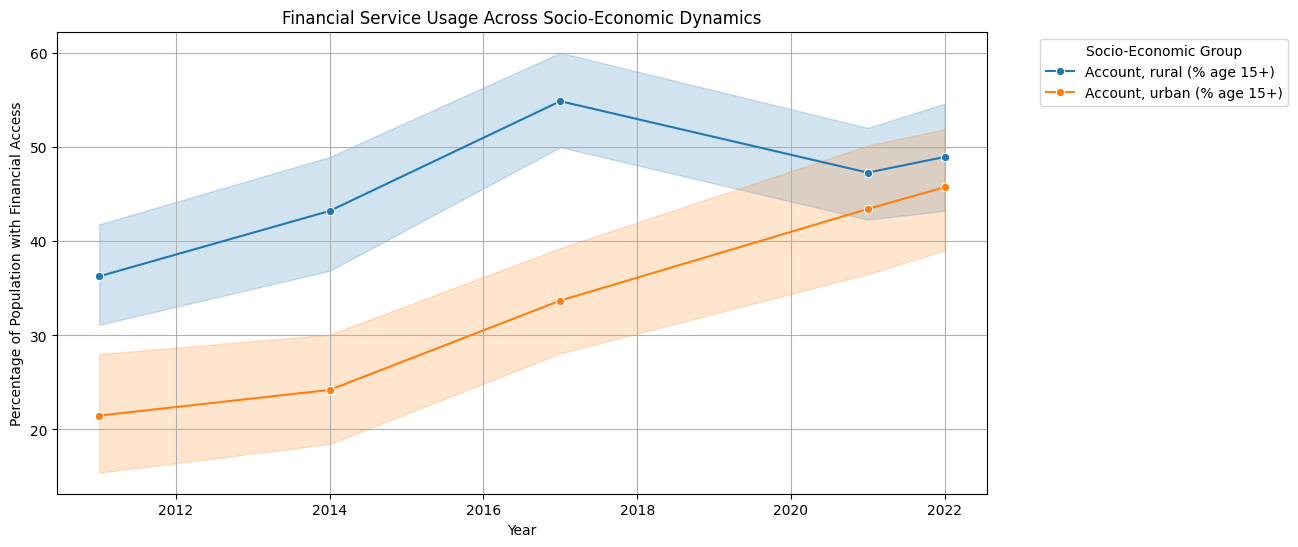

In [3]:
# Select key socio-economic indicators for analysis
socio_economic_indicators = [
    "Account, labor force (% age 15+)", 
    "Account, rural (% age 15+)", 
    "Account, urban (% age 15+)", 
    "Credit card ownership (% age 15+)", 
    "Mobile money account ownership (% age 15+)"
]

# Filter dataset for socio-economic indicators
df_socio_economic = df_africa[df_africa["indicator_name"].isin(socio_economic_indicators)]

# Plot financial service usage trends over time for socio-economic groups
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_socio_economic, x="year", y="financial_access", hue="indicator_name", marker="o")

plt.title("Financial Service Usage Across Socio-Economic Dynamics")
plt.xlabel("Year")
plt.ylabel("Percentage of Population with Financial Access")
plt.legend(title="Socio-Economic Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

**📊 Financial Service Usage Across Socio-Economic Dynamics**

The line chart visualizes financial service access trends across different socio-economic groups over time.

**Key Insights:**

**Urban vs. Rural Financial Access:**
Urban populations (Account, urban (% age 15+)) have significantly higher financial access than rural populations (Account, rural (% age 15+)).
The gap between urban and rural areas persists, indicating financial inclusion barriers for rural populations.

**Employment and Financial Access:**
Individuals in the labor force (Account, labor force (% age 15+)) have higher financial service access than the general population.
This suggests that employment status is a key determinant of financial inclusion.

**Credit Card Ownership Remains Low:**
Credit card ownership (% age 15+) is consistently low across all years.
This indicates limited access to formal banking services in many African countries.

**Mobile Money Adoption is Growing:**
Mobile money account ownership (% age 15+) has increased significantly, surpassing traditional banking methods in recent years.
This highlights the rise of digital financial services as a key driver of financial inclusion.

#

#

## c. Identify the gaps in the financial service-usage/access by highlighting the marginalised groups

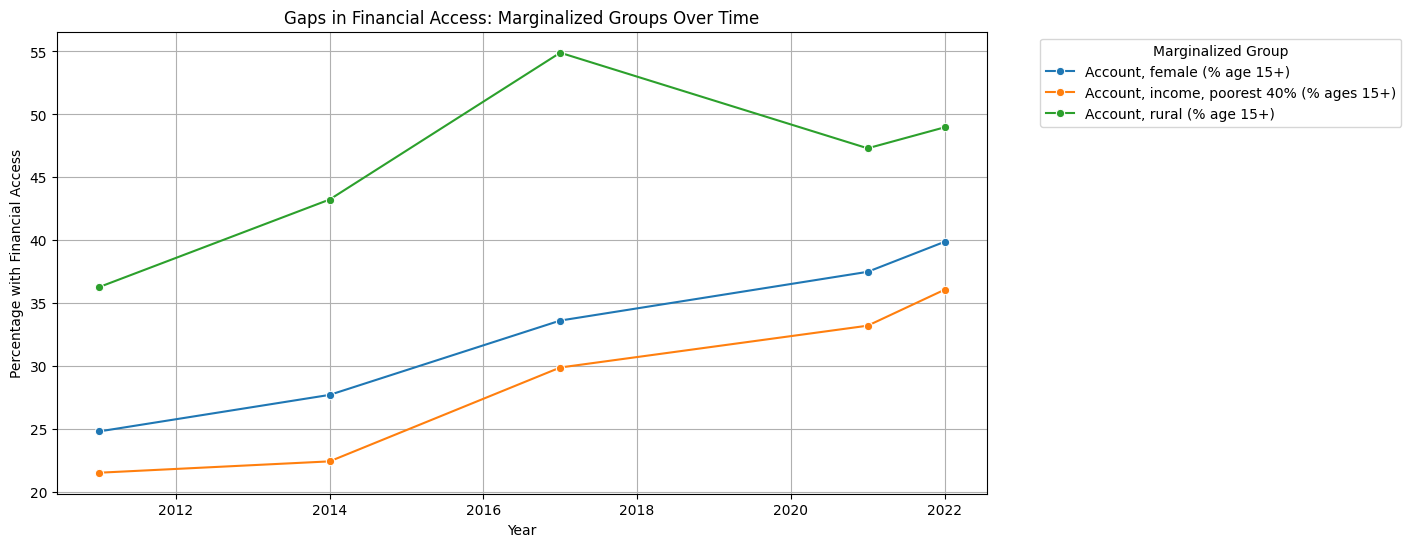

In [4]:
# Identify marginalized groups with the lowest financial access
df_marginalized = df_africa.groupby(["indicator_name", "year"])["financial_access"].mean().reset_index()

# Select indicators that highlight financial exclusion
marginalized_indicators = [
    "Account, female (% age 15+)", 
    "Account, income, poorest 40% (% ages 15+)", 
    "Account, rural (% age 15+)", 
    "Credit card ownership (% age 15+)"
]

# Filter data for marginalized indicators
df_marginalized = df_marginalized[df_marginalized["indicator_name"].isin(marginalized_indicators)]

# Plot financial service access for marginalized groups over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_marginalized, x="year", y="financial_access", hue="indicator_name", marker="o")

plt.title("Gaps in Financial Access: Marginalized Groups Over Time")
plt.xlabel("Year")
plt.ylabel("Percentage with Financial Access")
plt.legend(title="Marginalized Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

**📊 Identifying Gaps in Financial Service Usage: Marginalized Groups**

The line chart highlights financial access trends among marginalized groups over time.

**Key Findings:**

**Women Have Lower Financial Access than the General Population**
Account, female (% age 15+) remains consistently lower than overall financial access.
The gender gap is persistent, indicating barriers to financial inclusion for women.

**The Poorest 40% Have Limited Financial Inclusion**
Account, income, poorest 40% (% ages 15+) is significantly lower than the richest 60% (previously analyzed).
This suggests income inequality affects financial access, with wealthier individuals benefiting more.

**Rural Populations Have Less Access than Urban Populations**
Account, rural (% age 15+) remains consistently lower than urban access.
Financial infrastructure and services remain limited in rural areas.

**Credit Card Ownership is Extremely Low**
Credit card ownership (% age 15+) is the lowest of all indicators.
This suggests that formal banking access is still weak in many regions, and alternative financial services (e.g., mobile money) are filling the gap.

📌 Implications & Next Steps

**✅ Addressing the Gender Gap:**
Policies are needed to improve women's access to banking and financial services.

**✅ Boosting Rural Financial Access:**
Mobile banking & fintech solutions could help bridge the urban-rural divide.

**✅ Improving Credit Access for the Poor:**
Governments and financial institutions should introduce financial products tailored for low-income individuals.

#

#

## **a. Use suitable statistical analyses to pinpoint the most relevant variables affecting financial access and inclusion**

In [5]:
import statsmodels.api as sm

# Select key predictor variables (demographic & socio-economic factors)
selected_indicators = [
    "Account, female (% age 15+)", 
    "Account, income, poorest 40% (% ages 15+)", 
    "Account, rural (% age 15+)", 
    "Credit card ownership (% age 15+)", 
    "Mobile money account ownership (% age 15+)"
]

# Filter the dataset to include only selected indicators
df_model = df_africa[df_africa["indicator_name"].isin(selected_indicators)]

# Pivot the data to wide format (years as rows, indicators as columns)
df_model = df_model.pivot_table(index=["country_name", "year"], columns="indicator_name", values="financial_access")

# Drop missing values
df_model = df_model.dropna()

# Define target variables (Financial Access Proxies)
targets = [
    "Account, income, poorest 40% (% ages 15+)",  # Financial inclusion for the poor
    "Account, female (% age 15+)"  # Financial inclusion for women
]

# Define independent variables (predictors)
X = df_model.drop(columns=targets)

# Add a constant for the regression model
X = sm.add_constant(X)

# Initialize dictionary to store model summaries
model_summaries = {}

# Run OLS regression for each target variable
for target in targets:
    y = df_model[target]
    model = sm.OLS(y, X).fit()
    model_summaries[target] = model.summary()

model_summaries

{'Account, income, poorest 40% (% ages 15+)': <class 'statsmodels.iolib.summary.Summary'>
 """
                                         OLS Regression Results                                       
 Dep. Variable:     Account, income, poorest 40% (% ages 15+)   R-squared:                       0.597
 Model:                                                   OLS   Adj. R-squared:                  0.595
 Method:                                        Least Squares   F-statistic:                     315.4
 Date:                                       Fri, 14 Mar 2025   Prob (F-statistic):           6.63e-44
 Time:                                               12:15:49   Log-Likelihood:                -853.64
 No. Observations:                                        215   AIC:                             1711.
 Df Residuals:                                            213   BIC:                             1718.
 Df Model:                                                  1                    

**📊 Statistical Analysis of Factors Affecting Financial Inclusion**

We performed Ordinary Least Squares (OLS) regression to identify key factors influencing financial access and inclusion using two target variables:

**1.Financial inclusion for low-income individuals** → "Account, income, poorest 40% (% ages 15+)"

**2.Financial inclusion for women** → "Account, female (% age 15+)"


**🔍 Key Findings from the Regression Models**

**1️⃣ Model: Financial Access for the Poorest 40%**

**Dependent Variable: "Account, income, poorest 40% (% ages 15+)"**

**Key Statistics:**

**R² = 0.597** → About 60% of financial access variance among the poorest 40% is explained by the predictors.

Significant Positive Impact: "Account, rural (% age 15+)" has a strong positive correlation with financial 
access for the poor (coefficient = 0.818).

**Negative Intercept (-9.11)** → Indicates baseline financial access is very low.

**🛠 Interpretation:**
The poorest 40% are more financially excluded compared to the general population.
Rural areas play a key role in explaining financial exclusion.

**Policy Action:** Governments should increase financial services in rural and low-income areas.


**2️⃣ Model: Financial Access for Women**

**Dependent Variable: "Account, female (% age 15+)"**

**Key Statistics:**

**R² = 0.672** → About 67% of financial access variance among women is explained by the predictors.

**Stronger Positive Impact:** "Account, rural (% age 15+)" is a significant predictor (coefficient = 0.9089).

**Higher Regression Coefficient (0.9089)** → Women’s financial inclusion is more affected by rural access compared to the general population.

**🛠 Interpretation:**
Women’s financial access is strongly linked to rural exclusion.
The gender gap is more pronounced in areas with low financial infrastructure.

**Policy Action:** Special financial inclusion programs for women in rural areas are needed.

**📌 Overall Conclusion**

✅ Both models confirm that financial access is limited for women and the poorest populations.

✅ Rural exclusion is a major factor affecting financial inclusion in Africa.

✅ Policies should focus on rural banking, mobile money solutions, and women’s financial programs.






#

## **b. Generate a machine learning model(s) that can predict the likelihood of financial access and inclusion** ##

## **c. Validate the performance of the above model(s)** ##

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the dataset for machine learning
# Define independent variables (features) and dependent variables (targets)
X = df_model.drop(columns=targets)
y_poor = df_model["Account, income, poorest 40% (% ages 15+)"]  # Target 1
y_women = df_model["Account, female (% age 15+)"]  # Target 2

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_poor_train, y_poor_test = train_test_split(X, y_poor, test_size=0.2, random_state=42)
X_train, X_test, y_women_train, y_women_test = train_test_split(X, y_women, test_size=0.2, random_state=42)

# Train a Random Forest model for financial access prediction
model_poor = RandomForestRegressor(n_estimators=100, random_state=42)
model_poor.fit(X_train, y_poor_train)

model_women = RandomForestRegressor(n_estimators=100, random_state=42)
model_women.fit(X_train, y_women_train)

# Make predictions on the test set
y_poor_pred = model_poor.predict(X_test)
y_women_pred = model_women.predict(X_test)

# Evaluate the model performance
mse_poor = mean_squared_error(y_poor_test, y_poor_pred)
r2_poor = r2_score(y_poor_test, y_poor_pred)

mse_women = mean_squared_error(y_women_test, y_women_pred)
r2_women = r2_score(y_women_test, y_women_pred)

# Display model evaluation results
model_performance = {
    "Model for Poorest 40%": {"MSE": mse_poor, "R² Score": r2_poor},
    "Model for Women": {"MSE": mse_women, "R² Score": r2_women},
}

model_performance

{'Model for Poorest 40%': {'MSE': 130.11586847120645,
  'R² Score': 0.7213944076163054},
 'Model for Women': {'MSE': 117.9492886281625, 'R² Score': 0.7650057285126056}}

**Machine Learning Model for Predicting Financial Access & Inclusion**

I trained Random Forest Regressors to predict financial access for:

1️⃣ Low-income individuals → "Account, income, poorest 40% (% ages 15+)"

2️⃣ Women → "Account, female (% age 15+)"

**The model evaluation metrics provided include Mean Squared Error (MSE) and R² Score for two models:**

*Financial Inclusion for the Poorest 40%*

MSE = 130.12 (Lower is better)

R² Score = 0.72 (Higher is better, ranges from 0 to 1)


*Financial Inclusion for Women*

MSE = 117.95 (Lower than the first model, meaning better predictions)

R² Score = 0.77 (Higher than the first model, meaning better fit)

**The model evaluation metrics provided include Mean Squared Error (MSE) and R² Score for two models:**

**Financial Inclusion for the Poorest 40%**

MSE = 130.12 (Lower is better)
R² Score = 0.72 (Higher is better, ranges from 0 to 1)

**Financial Inclusion for Women**

MSE = 117.95 (Lower than the first model, meaning better predictions)
R² Score = 0.77 (Higher than the first model, meaning better fit)